In [116]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Configures plots

plt.style.use('seaborn-v0_8-dark-palette')

# Import the Data using pandas
df= pd.read_csv(r'C:\Users\msjhe\Desktop\Portfolio Projects\Python\Movie Correlation\Data\movies.csv')

In [62]:
# Looking at data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [63]:
# Check for nulls

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{}, {}%'.format(col, percent_missing))
    


name, 0.0%
rating, 0.010041731872717789%
genre, 0.0%
year, 0.0%
released, 0.0002608242044861763%
score, 0.0003912363067292645%
votes, 0.0003912363067292645%
director, 0.0%
writer, 0.0003912363067292645%
star, 0.00013041210224308815%
country, 0.0003912363067292645%
budget, 0.2831246739697444%
gross, 0.02464788732394366%
company, 0.002217005738132499%
runtime, 0.0005216484089723526%


In [64]:
# We will not be considering movies that have information missing

#Removing rows with null values
df = df.dropna()

In [65]:
# Check for nulls again

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{}, {}%'.format(col, percent_missing))
    

name, 0.0%
rating, 0.0%
genre, 0.0%
year, 0.0%
released, 0.0%
score, 0.0%
votes, 0.0%
director, 0.0%
writer, 0.0%
star, 0.0%
country, 0.0%
budget, 0.0%
gross, 0.0%
company, 0.0%
runtime, 0.0%


In [66]:
#Checking data types 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [67]:
# reformatting certain data types to make them more user friendly

#Changing certain data types with unnecessary decimals(all rounded already)
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['gross'].astype('int64')

In [68]:
#Extracting Correct Year from the release date
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(str)

In [122]:
#Sorting the data set by gross earnings
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


In [70]:
#Checking for Dupicates
df.duplicated().sum()

0

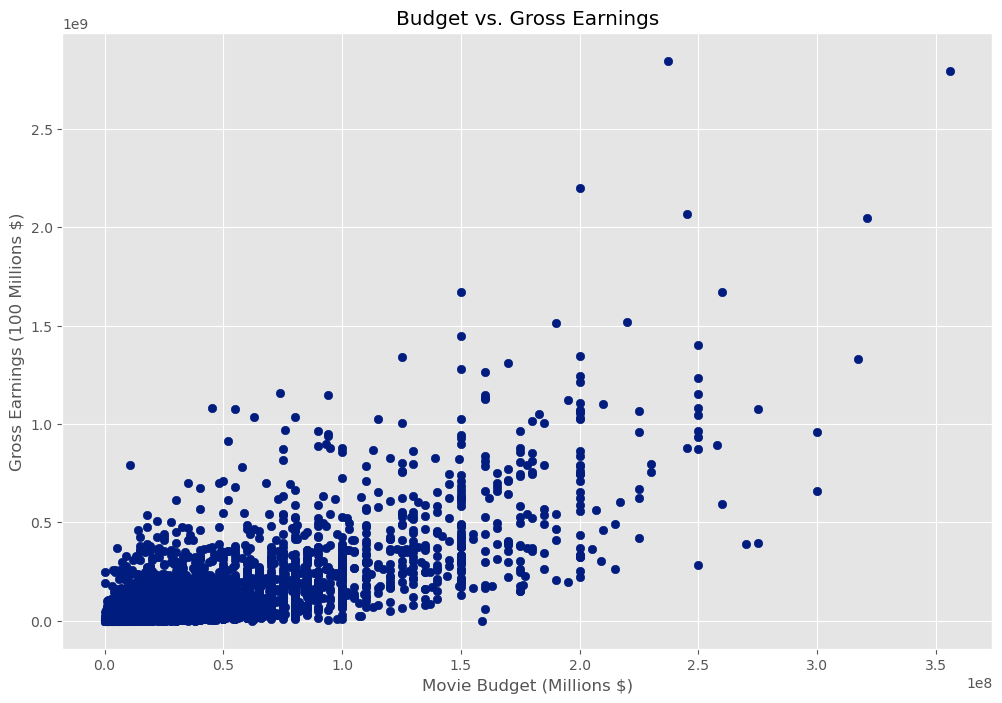

In [117]:
#Budget and gross revenue correlation

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Movie Budget (Millions $)')
plt.ylabel('Gross Earnings (100 Millions $)')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

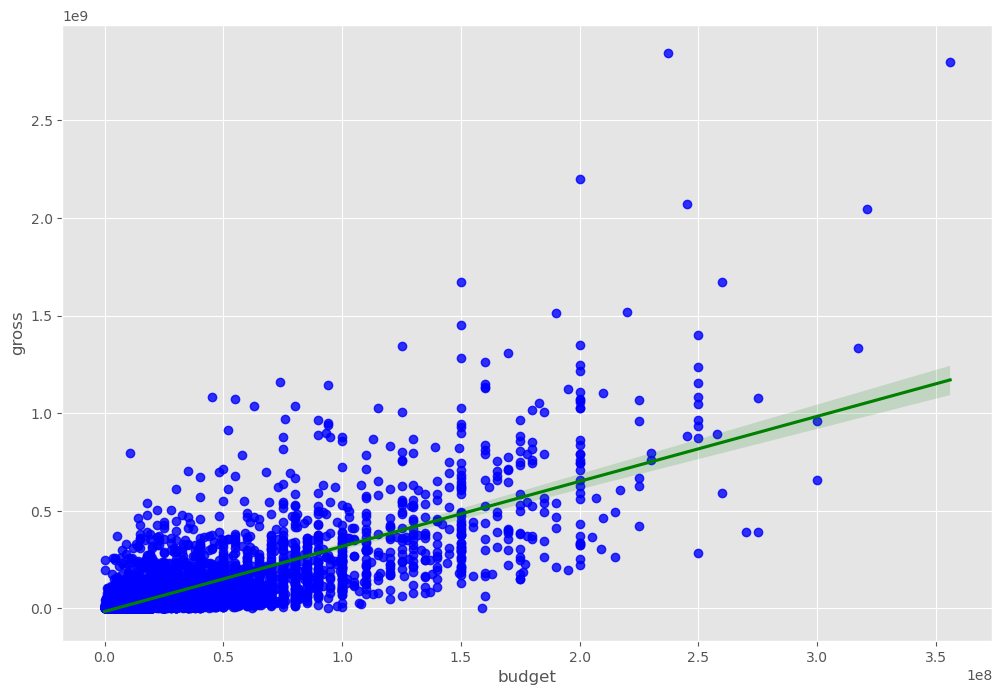

In [119]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'blue'}, line_kws={'color':'green'})

C:\Users\msjhe\AppData\Local\Temp\ipykernel_14092\1901750359.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


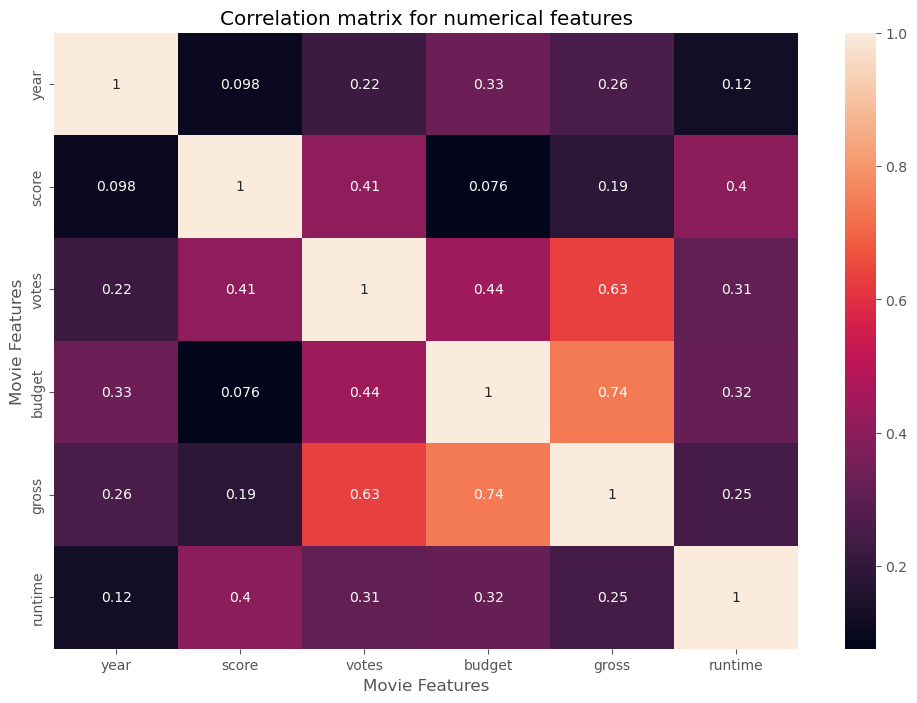

In [120]:
#Check the correlation between cols using heat map

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for numerical features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [110]:
#Finding the top 10 gross earning companies 

df2 = df[['company', 'gross']]


df2 = df2.groupby('company').sum().sort_values(by=['gross'], inplace=False, ascending=False).head(10)
df2

,gross
company,
Warner Bros.,54610959970
Universal Pictures,51241105418
Columbia Pictures,42356430218
Paramount Pictures,40021704691
Twentieth Century Fox,39542573303
Walt Disney Pictures,35833650748
New Line Cinema,19612851164
Marvel Studios,15065592411
DreamWorks Animation,11873612858


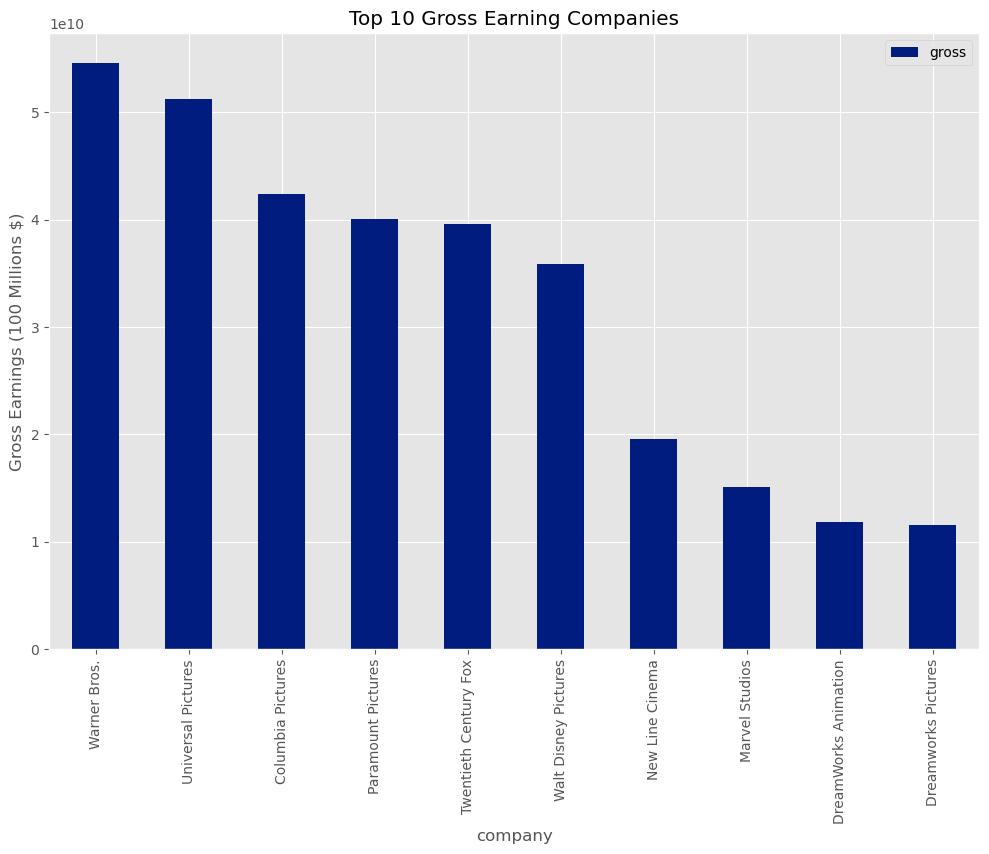

In [121]:
#Plotting Top 10 Gross Earning Companies

df2.plot(kind='bar')
plt.title('Top 10 Gross Earning Companies')
plt.ylabel('Gross Earnings (100 Millions $)')
plt.show()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
